In [ ]:
! pip install mlxtend

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = datasets.load_iris()
X = dataset.data[:,[0,2]]
y = dataset.target
print(X.shape)

(150, 2)


## Decide the Classifier to be used in Stacking Ensamble

In [10]:
# leva - 0 base classifier
clf1 = KNeighborsClassifier(n_neighbors=1)

clf2 = DecisionTreeClassifier(random_state=1)

clf3 = GaussianNB()

# leval 1 meta classifier
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

label = ['knn', 'Dt', 'nb', 'st']

clf_list = [clf1, clf2, clf3, sclf]

Accuracy: 0.91 (+/- 0.03) [knn]
Accuracy: 0.95 (+/- 0.02) [Dt]
Accuracy: 0.91 (+/- 0.02) [nb]
Accuracy: nan (+/- nan) [st]


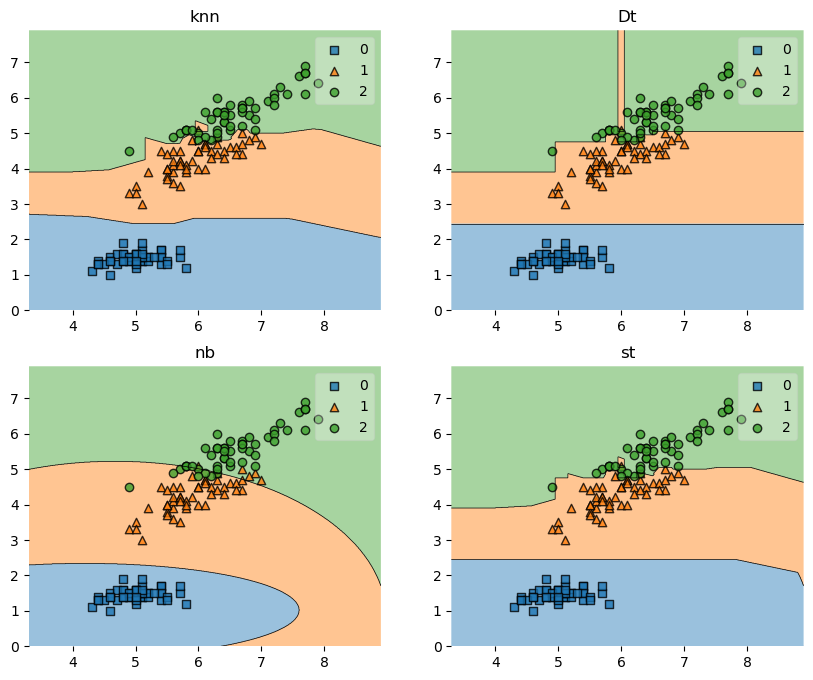

In [11]:
# Train the Model
clf_cv_mean = []
clf_cv_std = []

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')

    print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))

    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())

    clf.fit(X,y)

    ax = plt.subplot(gs[grd[0], grd[1]])

    fig = plot_decision_regions(X,y,clf)

    plt.title(label)

plt.show()